# Contours
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.
In this blog , we will see how to find contours, draw .
we wll use these functions : cv2.findContours(), cv2.drawContours().

    For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
    findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables.
    In OpenCV, finding contours is like finding white object from black background. So remember, object to be found should be white and background should be black.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:

def displayImage(imageList,cmap=None):
    plt.figure(figsize=(18,12))
    i = 0
    for item in imageList:  
        plt.subplot(2, 5, i+1)
        plt.imshow(item['image'],cmap)
        i += 1
        plt.axis('off')
        plt.title(item['name'],fontsize = 18, color = 'green')
    plt.tight_layout()
    plt.show()
    

[[[  -1   -1    1   -1]
  [  -1   -1    2    0]
  [  -1   -1    3    1]
  ...
  [1196 1193   -1    2]
  [1197 1195   -1    2]
  [  -1 1196   -1    2]]]


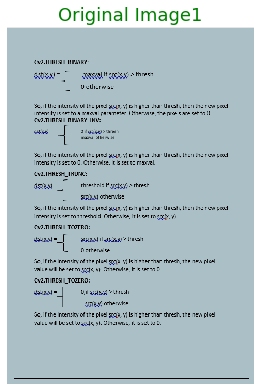

In [3]:
#img = cv2.imread('images/black-white.jpg') 
img = cv2.imread('images/formula-with -border.png') 
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contour = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(contour)
displayImage([
        {'name':'Original Image1','image':img},
        ],'gray')

## Draw Contours:
To draw the contours, cv2.drawContours function is used. It can also be used to draw any shape provided you have its boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.
To draw all the contours in an image:

img = cv2.drawContours(img, contours, -1, (0,255,0), 3)

To draw an individual contour, say 4th contour:

img = cv2.drawContours(img, contours, 3, (0,255,0), 3)

But most of the time, below method will be useful:

cnt = contours[4]
img = cv2.drawContours(img, [cnt], 0, (0,255,0), 3)

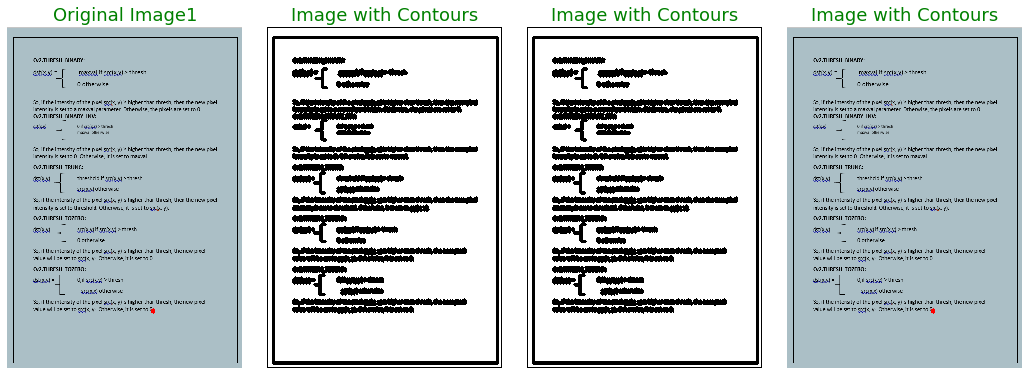

In [4]:
#img = cv2.imread('images/black-white.jpg') 
img = cv2.imread('images/formula-with -border.png') 
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, struc = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# To draw all the contours in an image
img2 = cv2.drawContours(thresh, contours, -1, (0,255,0), 3)
# To draw an individual contour, say 4th contour:
img3 = cv2.drawContours(thresh, contours, 3, (0,255,0), 3)
cnt = contours[4]
# But most of the time, below method will be useful:
img4 = cv2.drawContours(img, [cnt], 0, (255,0,0), 7)
displayImage([
        {'name':'Original Image1','image':img},
        {'name':'Image with Contours','image':img2},
        {'name':'Image with Contours','image':img3},
         {'name':'Image with Contours','image':img4},
        ],'gray')

[[ 83   7]
 [ 83 489]
 [455 489]
 [455   7]]
Perimeter: 1708.0
Area: 179304.0


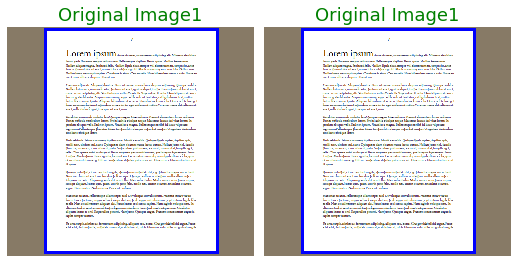

83 7 373 483


In [5]:
im = cv2.imread('images/pdfImg.png') 
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#To draw all the contours in an image
#cv2.drawContours(im, contours, -1, (100,255,0), 3)
# To draw an individual contour, say 4th contour
#cnt = contours[4]
#cv2.drawContours(im, cnt, 0, (0,255,0), 3)
cnt = contours[0] 
contours1 = contours[0].reshape(-1,2)
print((contours1))

x,y,w,h = cv2.boundingRect(cnt)
img2 = cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),5)

perimeter = cv2.arcLength(cnt,True)
print("Perimeter:",perimeter)
area = cv2.contourArea(cnt)
print("Area:",area)
displayImage([
        {'name':'Original Image1','image':im},
         {'name':'Original Image1','image':img2},
        ],'gray')

print(x,y,w,h)

In [6]:
im.shape

(498, 535, 3)

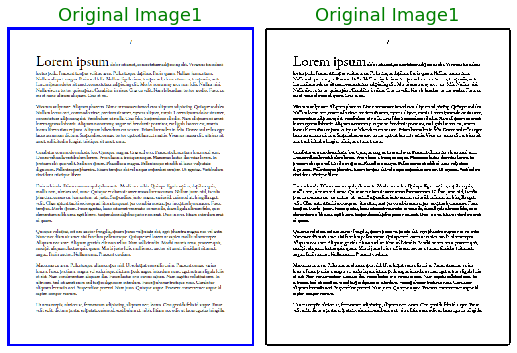

True

In [22]:
from skimage.filters import threshold_local
dim = (700,900)
resized = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
crop_img = img2[y:y+h, x:x+w]
#resized = cv2.resize(crop_img, dim, interpolation = cv2.INTER_AREA)
warped = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255
crop_img = crop_img 
#resized = cv2.resize(crop_img, dim, interpolation = cv2.INTER_AREA)
th3 = cv2.adaptiveThreshold(warped,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

displayImage([
         {'name':'Original Image1','image':crop_img},
    {'name':'Original Image1','image':warped},
        ],'gray')

#cv2.imwrite("warped.jpg",warped)

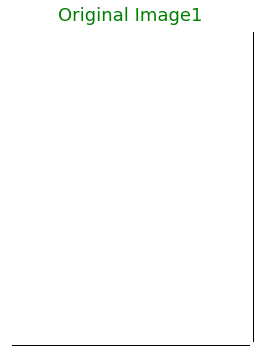

In [30]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
displayImage([
         {'name':'Original Image1','image':dilation},
        ],'gray')
